In [81]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data
import numpy as np

import tensorflow as tf #neural networks library
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

I chose to work on the Gender recognition of voice because i thought that it could be interesting to see the results.


In [82]:
#we import the dataset
df = pd.read_csv('voice.csv')
df=pd.get_dummies(df, drop_first=True)
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label_male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


Now we take 7 variables that i think have strong predictive value, also i din't understood what some of them represented so i choose only between the one i know.

In [83]:
selec=df[['meanfreq','sd','sfm','mode','centroid','dfrange','label_male']]
selec.dropna()

,meanfreq,sd,sfm,mode,centroid,dfrange,label_male
0,0.059781,0.064241,0.491918,0.000000,0.059781,0.000000,1
1,0.066009,0.067310,0.513724,0.000000,0.066009,0.046875,1
2,0.077316,0.083829,0.478905,0.000000,0.077316,0.007812,1
3,0.151228,0.072111,0.727232,0.083878,0.151228,0.554688,1
4,0.135120,0.079146,0.783568,0.104261,0.135120,5.476562,1
...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.763182,0.200836,0.131884,4.203125,0
3164,0.116221,0.089221,0.709570,0.013683,0.116221,3.640625,0
3165,0.142056,0.095798,0.654196,0.008006,0.142056,2.929688,0
3166,0.143659,0.090628,0.675470,0.212202,0.143659,3.585938,0


now we look at each variable and search for the outliars
so that we can clean them if necessary
(i only let the plots of the variable with lots of outliers)

C:\Users\tomre\PycharmProjects\JupiterNotebook\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


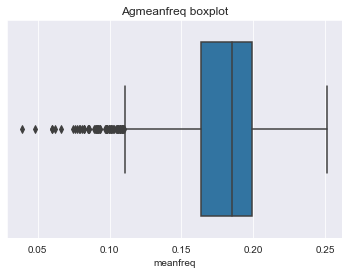

In [84]:
sns.boxplot(df['meanfreq'])
plt.title('Agmeanfreq boxplot')
plt.xlabel('meanfreq')
plt.show()

C:\Users\tomre\PycharmProjects\JupiterNotebook\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


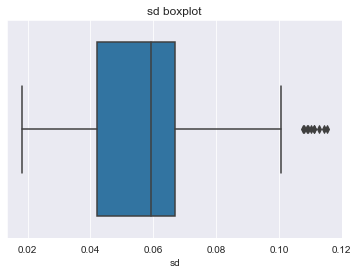

In [85]:
sns.boxplot(df['sd'])
plt.title('sd boxplot')
plt.xlabel('sd')
plt.show()

C:\Users\tomre\PycharmProjects\JupiterNotebook\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


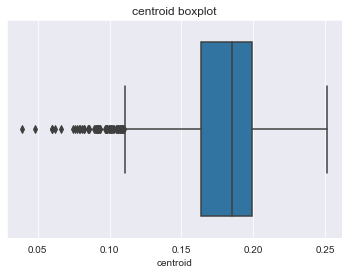

In [86]:
sns.boxplot(df['centroid'])
plt.title('centroid boxplot')
plt.xlabel('centroid')
plt.show()

now we're going to use the k-nearest neighbor to train a model to predict the gender based on voice variable that we selcted
To do that we split the dataframe into a training one and a testing one
Then we create a model with the training dataframe and we see how good it fit into the testing one

In [87]:
from sklearn.preprocessing import normalize  #get the function needed to normalize our data.

X = df.loc[:, 'meanfreq':'dfrange']  #create the X matrix
X = normalize(X)  #normalize the matrix to put everything on the same scale
y = df['label_male']  #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier  #the object class we need

knn = KNeighborsClassifier(n_neighbors=5)  #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train)  #this fits the k-nearest neigbor model with the train data


After training the model we calculate how well it fits the testing dataframe

In [88]:
knn.score(X_test, y_test)  #calculate the fit on the test data

0.7960042060988434

Almost 80% of the prediction are accurate which is pretty good
Then we can see the confusion matrix of the predictions

In [89]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[362,  95],
       [ 99, 395]], dtype=int64)

Now we calculte the precision, accuracy and recal of the model.

In [90]:
conf_matrix = pd.DataFrame(cm, index=['Female(actual)', 'Male (actual)'],
                           columns=['Female(predicted)', 'Male (predicted)'])
conf_matrix

,Female(predicted),Male (predicted)
Female(actual),362,95
Male (actual),99,395


In [94]:
mort_accuracy = (conf_matrix.iloc[1]['Male (predicted)']+conf_matrix.iloc[0]['Female(predicted)'])/(conf_matrix.iloc[0]['Female(predicted)']+conf_matrix.iloc[1]['Female(predicted)']+conf_matrix.iloc[0]['Female(predicted)']+conf_matrix.iloc[1]['Female(predicted)'])
mort_accuracy

0.8210412147505423

In [91]:
Gender_precision = conf_matrix.iloc[0]['Female(predicted)']/(conf_matrix.iloc[0]['Female(predicted)']+conf_matrix.iloc[0]['Male (predicted)'])
Gender_precision

0.7921225382932167

In [92]:
mort_recal = conf_matrix.iloc[0]['Female(predicted)']/(conf_matrix.iloc[0]['Female(predicted)']+conf_matrix.iloc[1]['Female(predicted)'])
mort_recal

0.7852494577006508

We can see that the model seems to be better at predicting Male than Female because the recal with female prediction is worst than the acuracy